Задание 1.
Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации.

SVM с каким ядром дал лучший результат?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


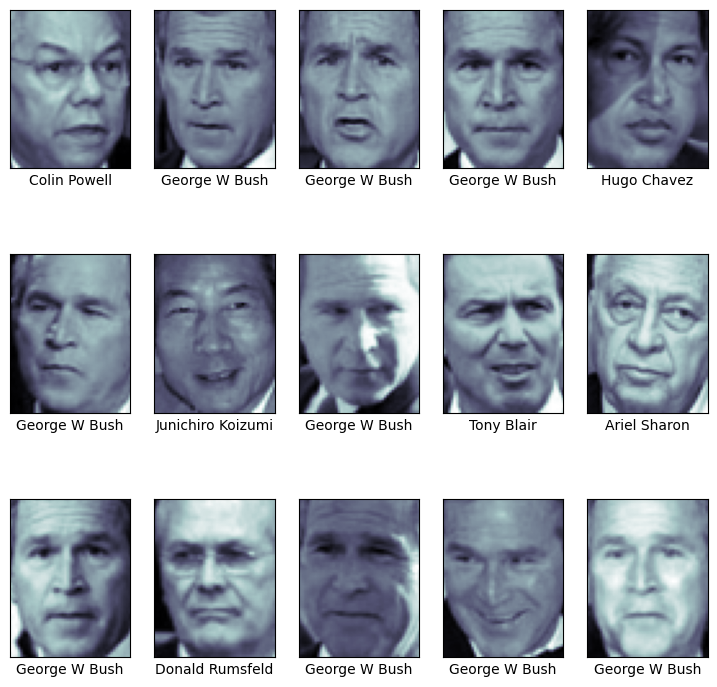

In [3]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [2]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=111)

In [108]:
svc = SVC(kernel='poly')
model = make_pipeline(pca, svc)


In [109]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=111)

In [110]:
# подбираю гиперпараметры
param_grid = {'svc__degree': [1, 2, 3, 4, 5], 'svc__coef0': [0, 0.2, 0.5, 1]}
grid = GridSearchCV(model, param_grid, n_jobs=-1)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__coef0': 1, 'svc__degree': 2}


In [111]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

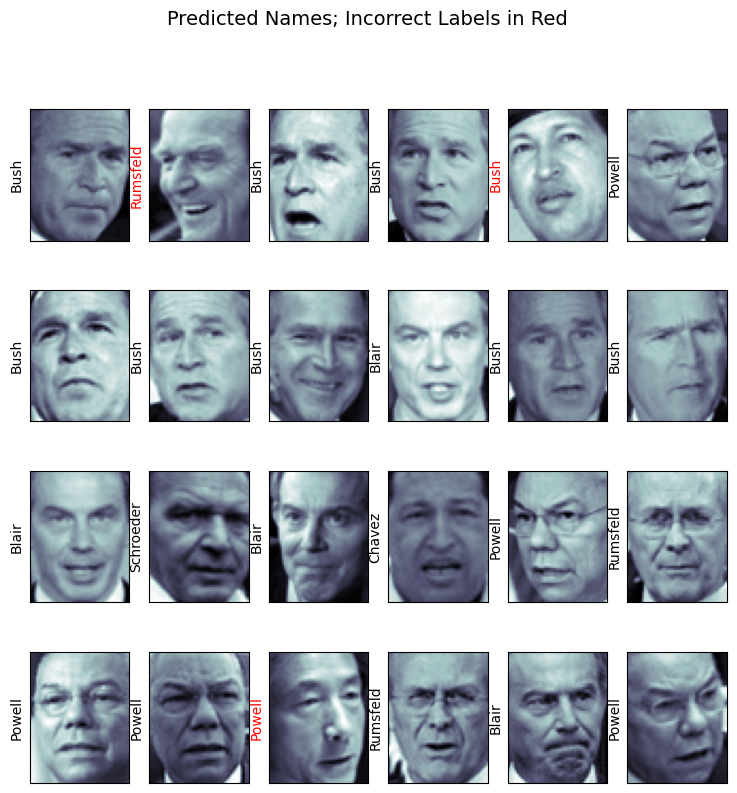

In [112]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [113]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.60      0.73        20
     Colin Powell       0.80      0.89      0.84        54
  Donald Rumsfeld       0.79      0.70      0.75        27
    George W Bush       0.81      0.95      0.88       139
Gerhard Schroeder       0.83      0.50      0.62        20
      Hugo Chavez       0.93      0.78      0.85        18
Junichiro Koizumi       1.00      0.73      0.85        15
       Tony Blair       0.85      0.77      0.81        44

         accuracy                           0.83       337
        macro avg       0.87      0.74      0.79       337
     weighted avg       0.84      0.83      0.83       337



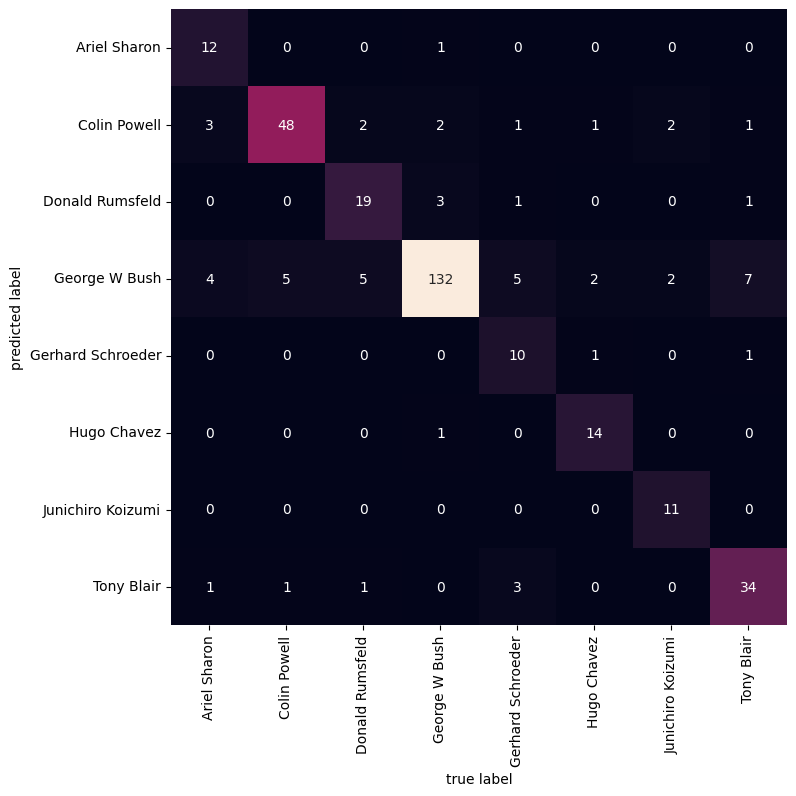

In [114]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.8308605341246291

In [42]:
svc = SVC(kernel='rbf')
model = make_pipeline(pca, svc)

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=111)

In [44]:
# подбор гиперпараметров
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [45]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

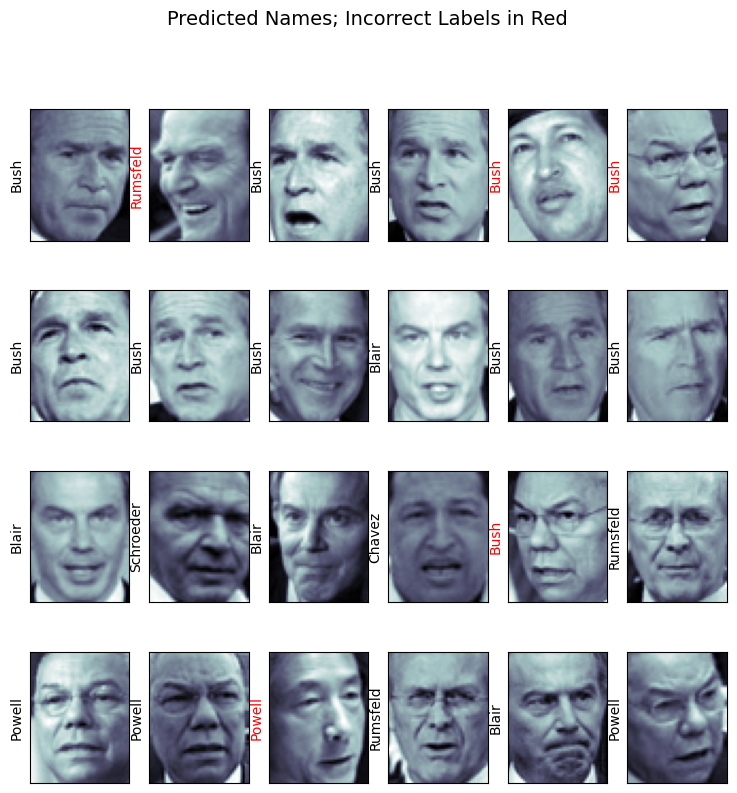

In [46]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [47]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.75      0.79        20
     Colin Powell       0.78      0.83      0.80        54
  Donald Rumsfeld       0.75      0.67      0.71        27
    George W Bush       0.84      0.95      0.89       139
Gerhard Schroeder       0.77      0.50      0.61        20
      Hugo Chavez       0.93      0.78      0.85        18
Junichiro Koizumi       1.00      0.73      0.85        15
       Tony Blair       0.85      0.77      0.81        44

         accuracy                           0.83       337
        macro avg       0.84      0.75      0.79       337
     weighted avg       0.83      0.83      0.82       337



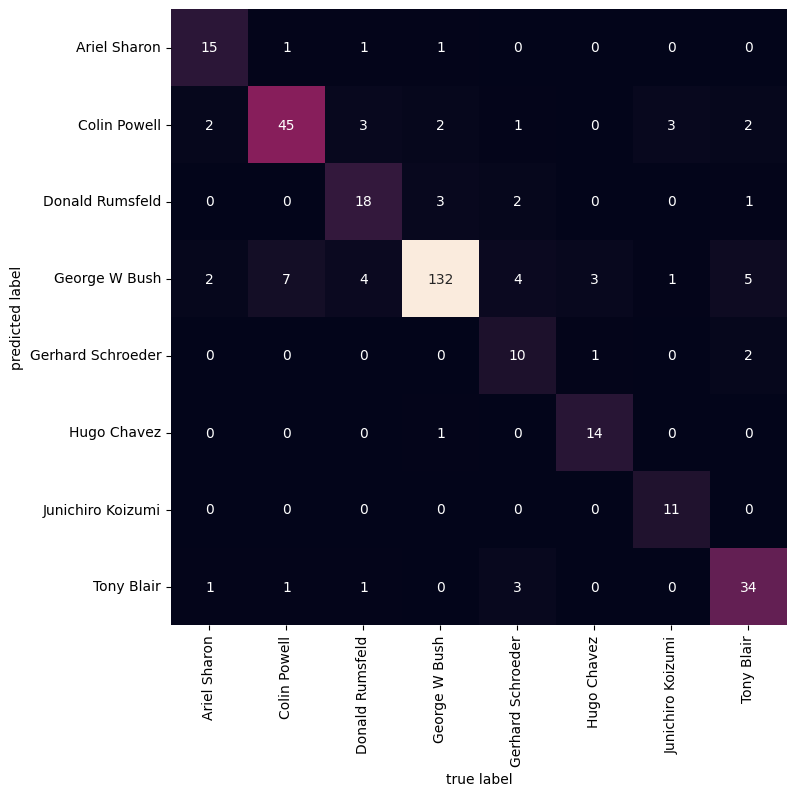

In [48]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
accuracy_score(yfit,ytest)

0.827893175074184

In [58]:
svc = SVC(kernel='sigmoid')
model = make_pipeline(pca, svc)

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=111)

In [60]:
# подбор гиперпараметров
param_grid = {'svc__C': [1, 5, 10, 50],'svc__coef0': [0, 0.2, 0.5, 1], 'svc__gamma': [0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__coef0': 0.5, 'svc__gamma': 0.001}


In [61]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

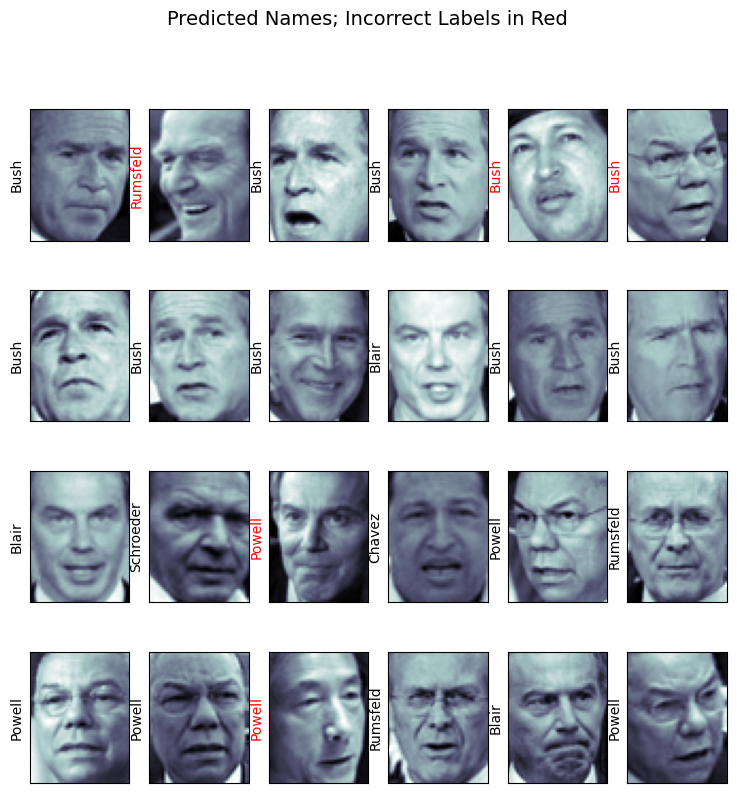

In [62]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [63]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.70      0.78        20
     Colin Powell       0.80      0.83      0.82        54
  Donald Rumsfeld       0.82      0.67      0.73        27
    George W Bush       0.80      0.96      0.87       139
Gerhard Schroeder       0.61      0.55      0.58        20
      Hugo Chavez       0.93      0.78      0.85        18
Junichiro Koizumi       1.00      0.67      0.80        15
       Tony Blair       0.91      0.66      0.76        44

         accuracy                           0.82       337
        macro avg       0.84      0.73      0.77       337
     weighted avg       0.82      0.82      0.81       337



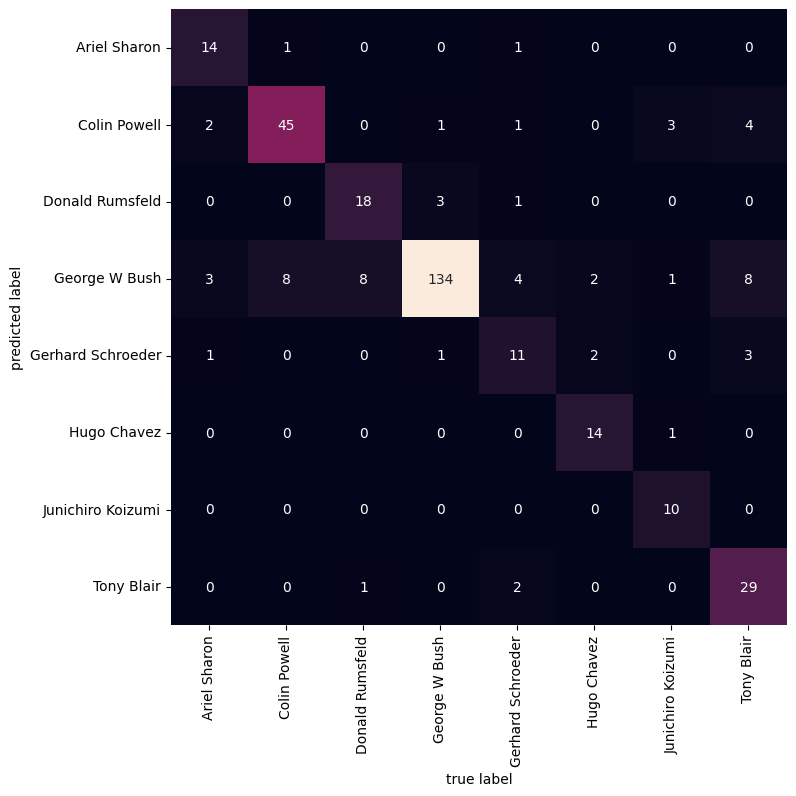

In [64]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [65]:
accuracy_score(yfit,ytest)

0.8160237388724035

SVM с ядром 'poly' дал наилучший результат, SVM с ядром 'rbf' уступает совсем немного

Задание 2.
Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1. Объявите модель, состоящую из pipeline(pca,logistic regression)

2. Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3. Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [14]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=111)
model = make_pipeline(pca, lr)


In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=111)

In [16]:
param_grid = {'logisticregression__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'logisticregression__C': 1}


In [17]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

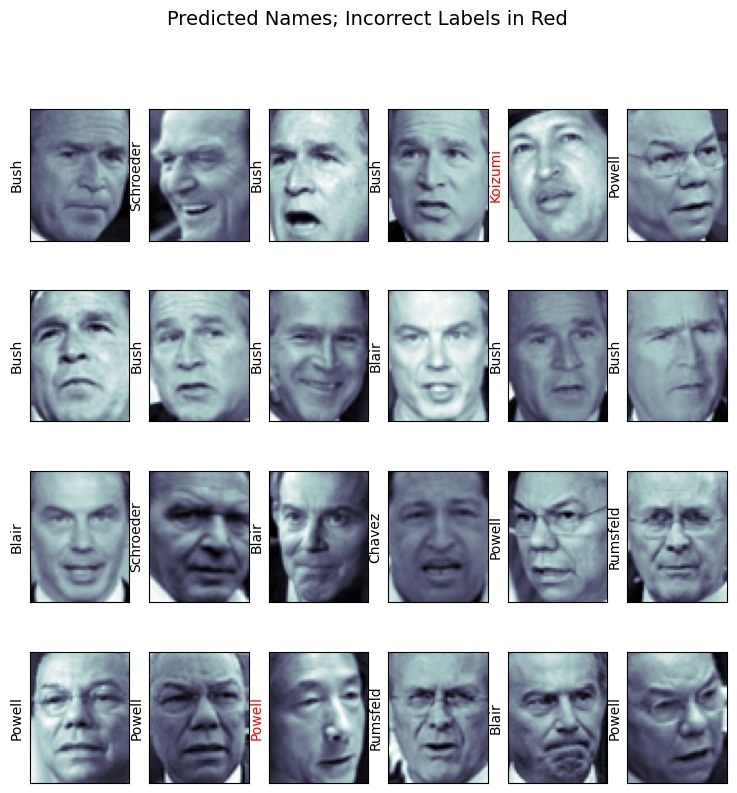

In [172]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [18]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.85      0.87        20
     Colin Powell       0.84      0.91      0.88        54
  Donald Rumsfeld       0.63      0.70      0.67        27
    George W Bush       0.93      0.91      0.92       139
Gerhard Schroeder       0.63      0.60      0.62        20
      Hugo Chavez       0.75      0.83      0.79        18
Junichiro Koizumi       0.92      0.73      0.81        15
       Tony Blair       0.81      0.80      0.80        44

         accuracy                           0.85       337
        macro avg       0.80      0.79      0.80       337
     weighted avg       0.85      0.85      0.85       337



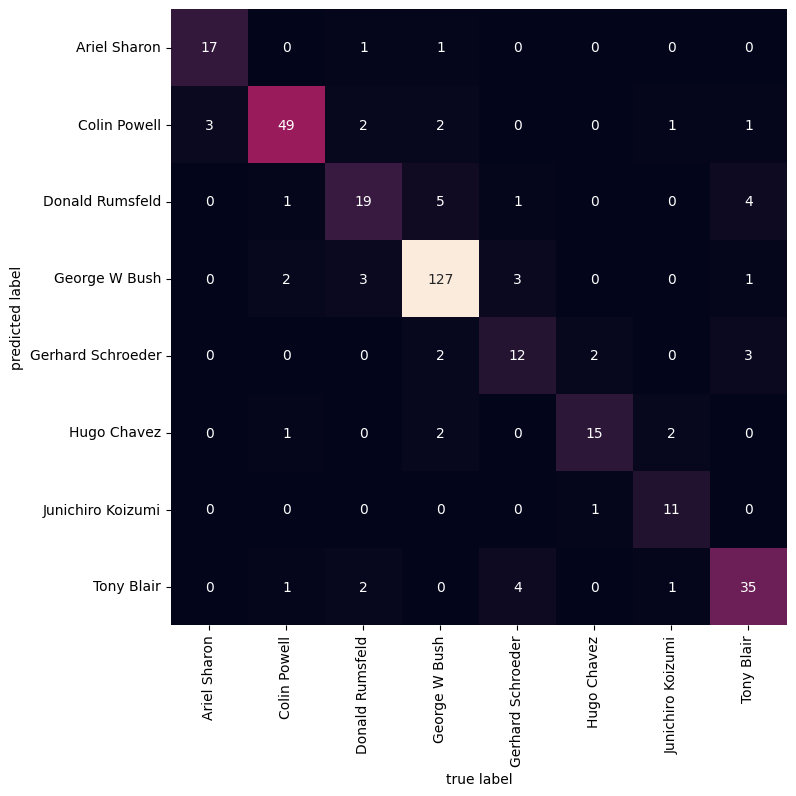

In [174]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [175]:
accuracy_score(yfit,ytest)

0.8456973293768546

С использованием class_weight='balanced' значение accuracy чуть выше, чем без него, при этом модель показывает немного более высокие значения recall, а значения precision наоборот чуть ниже

Задание 3

In [3]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [179]:
set(data.type)

{'red', 'white'}

In [4]:
data['type']  = data['type'].apply(lambda x: 1 if x == 'red' else 0)

In [181]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

fixed acidity       0.153917
pH                  0.138525
volatile acidity    0.123134
sulphates           0.061567
citric acid         0.046175
residual sugar      0.030783
chlorides           0.030783
dtype: float64 %


In [5]:
data = data.fillna(data.mean ()) # пропуски заполняю средними значениями

In [6]:
data = data.replace(to_replace=[3, 9], value=[4, 8]) # объединяю 3 и 9 касс качества с 4 и 8,т.к. у 3 и 9 слишком мало представителей

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

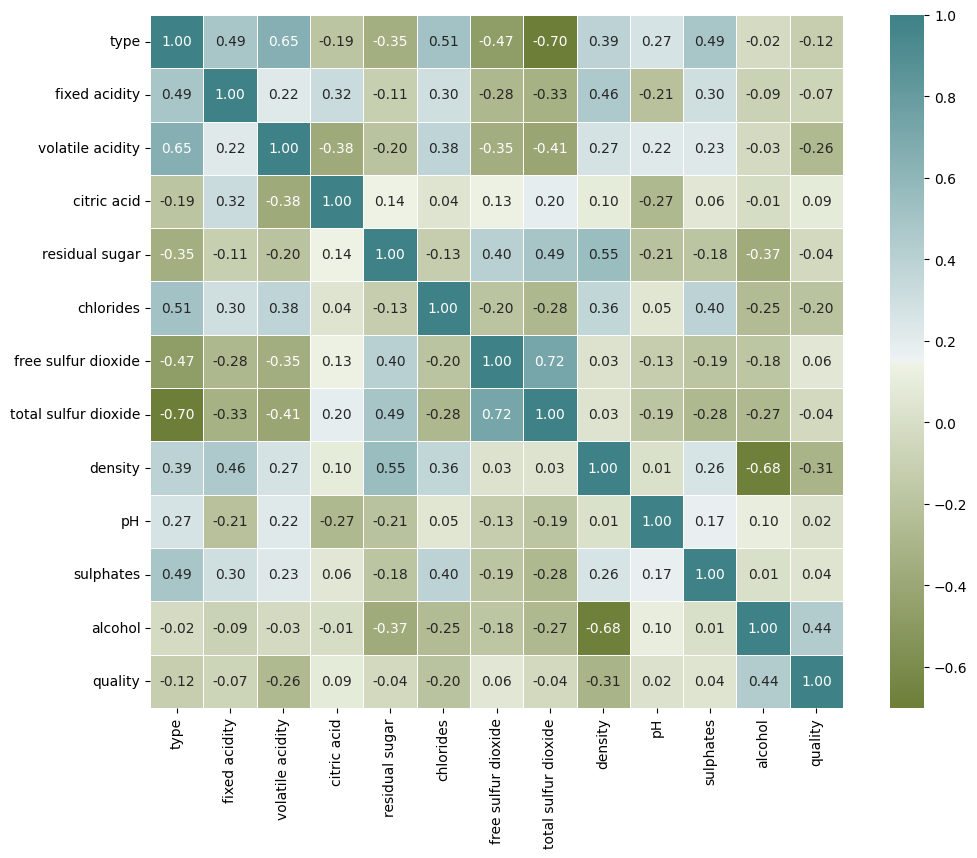

In [7]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [8]:
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

In [9]:
model = make_pipeline(StandardScaler(), LogisticRegression(solver='saga', random_state=111)) # использую solver='saga', потому что с solver='linear' не работает(возможно большой набор данных), а saga используется для больших датасетов
param_grid = {'logisticregression__C': [0.1, 1, 10], 'logisticregression__max_iter': [100, 200, 300]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)



c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-pac

{'logisticregression__C': 0.1, 'logisticregression__max_iter': 100}


In [10]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [11]:
print(classification_report(y_test, yfit)) # в данном случае объединение не особо помогло, т.к. объектов с quality 8 все равно мало. К тому же значение accuracy уменьшилось

              precision    recall  f1-score   support

           4       0.50      0.02      0.03        66
           5       0.56      0.61      0.58       507
           6       0.52      0.68      0.59       731
           7       0.39      0.16      0.23       277
           8       0.00      0.00      0.00        44

    accuracy                           0.52      1625
   macro avg       0.39      0.29      0.28      1625
weighted avg       0.49      0.52      0.48      1625



c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,y_test)

0.5218461538461538

In [21]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [22]:
param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9], 'kneighborsclassifier__weights': ['uniform', 'distance'], 'kneighborsclassifier__p': [1, 2], 'kneighborsclassifier__metric': ['euclidian', 'manhattan']}
grid = GridSearchCV(model, param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}


c:\Python\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python\lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Python\lib\site-packages\sklearn\base.py", line 1344, in wrappe

In [23]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [24]:
print(classification_report(y_test, yfit)) # здесь удалось избавиться от нулей, а значение accuracy стало чуточку выше

              precision    recall  f1-score   support

           4       0.58      0.11      0.18        66
           5       0.68      0.71      0.70       507
           6       0.66      0.73      0.70       731
           7       0.65      0.58      0.61       277
           8       0.87      0.45      0.60        44

    accuracy                           0.67      1625
   macro avg       0.69      0.52      0.56      1625
weighted avg       0.67      0.67      0.66      1625



In [25]:
accuracy_score(yfit,y_test) # показывает лучшие результаты среди всех рассмотренных моделей

0.6676923076923077

In [31]:
# решила попробовать использовать SVM c ядром 'poly', потому что в первом задании он показал наилучший результат
model = make_pipeline(StandardScaler(), SVC(kernel='poly'))

In [32]:
param_grid = {'svc__degree': [1, 2, 3, 4, 5], 'svc__coef0': [0, 0.2, 0.5, 1]}
grid = GridSearchCV(model, param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'svc__coef0': 1, 'svc__degree': 4}


In [33]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [34]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           4       0.46      0.17      0.24        66
           5       0.63      0.68      0.65       507
           6       0.58      0.71      0.64       731
           7       0.56      0.30      0.39       277
           8       0.17      0.02      0.04        44

    accuracy                           0.59      1625
   macro avg       0.48      0.38      0.39      1625
weighted avg       0.57      0.59      0.57      1625



In [35]:
accuracy_score(yfit,y_test)

0.5901538461538461

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier()

In [47]:
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 5, 10, 15]}
grid = GridSearchCV(model, param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [49]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           4       0.28      0.18      0.22        66
           5       0.57      0.64      0.60       507
           6       0.57      0.59      0.58       731
           7       0.50      0.42      0.45       277
           8       0.52      0.25      0.34        44

    accuracy                           0.55      1625
   macro avg       0.49      0.42      0.44      1625
weighted avg       0.55      0.55      0.55      1625



In [50]:
accuracy_score(yfit,y_test)

0.552